In [220]:
#Importing necessary libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt 

In [221]:
#Importing the clean df:
df = pd.read_csv('/Users/MeshaelAlrasheed/Desktop/Master/AI/Datasets/data_cleaned.csv')
df.head()
df.drop(columns=['Unnamed: 0'])

,user_id,Fairly_Active(mins),Lightly_Active(mins),Sedentary(mins),Very_Active(mins),BMI,Calories,Distance,Efficiency,Steps,RHR,GAD-7,PHQ-8,Covid_Status
0,00a9SPtBFkYF8KmWTvPPU0y69Xo1,6.055556,171.300000,760.352941,11.833333,22.624415,2619.666667,4.232667,94.476190,5371.411765,54.000000,9.00000,17.000000,no
1,00a9SPtBFkYF8KmWTvPPU0y69Xo1,6.400000,136.133333,757.866667,6.866667,22.672380,2369.466667,2.704683,92.684211,3309.600000,55.066667,7.00000,14.500000,yes
2,01dWPpgq7Nenmdej73ONXdNDjaH2,28.812500,166.117647,760.687500,44.625000,30.992470,3054.000000,8.072777,40.285714,9942.200000,61.611111,5.72834,7.474878,no
3,01dWPpgq7Nenmdej73ONXdNDjaH2,14.000000,100.666667,786.666667,25.733333,33.001465,2712.266667,3.815629,54.636364,5355.733333,58.800000,0.12500,0.111111,yes
4,03PCkZSgsRg3lgPAu37srPG1VGG3,67.866667,335.785714,488.600000,16.933333,28.613124,3224.600000,10.484668,88.722222,14137.600000,73.846154,5.72834,7.474878,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2133,zv7BUkCSS9eatY96QyEc1wKlqJE3,2.900000,260.466667,645.133333,1.500000,17.692781,1528.166667,3.462225,89.297297,5154.566667,68.516129,20.40000,21.800000,yes
2134,zwpspvv3nVXN9Q1H3abS4VqdGVH2,18.579971,217.661997,881.041778,26.247309,30.616663,2290.083609,5.918703,88.155696,8411.555631,64.406843,14.00000,14.000000,no
2135,zwpspvv3nVXN9Q1H3abS4VqdGVH2,16.333333,285.666667,772.133333,8.133333,32.138983,2514.866667,4.518411,94.380952,6753.866667,76.266667,4.84866,5.738604,yes
2136,zxSQFV06pzSr3eOw5sZ5ETv2NaD2,17.909091,186.000000,1197.500000,54.875000,25.387360,2077.937500,9.050648,90.000000,11233.846150,58.000000,1.75000,5.250000,no


In [222]:
#coding covid status
df["Covid_Status"].replace({'yes': 1, 'no' : 0}, inplace=True)


In [223]:
#removing unneded coloumns
df = df.drop(columns=['Unnamed: 0'])
df.head()

,user_id,Fairly_Active(mins),Lightly_Active(mins),Sedentary(mins),Very_Active(mins),BMI,Calories,Distance,Efficiency,Steps,RHR,GAD-7,PHQ-8,Covid_Status
0,00a9SPtBFkYF8KmWTvPPU0y69Xo1,6.055556,171.300000,760.352941,11.833333,22.624415,2619.666667,4.232667,94.476190,5371.411765,54.000000,9.00000,17.000000,0
1,00a9SPtBFkYF8KmWTvPPU0y69Xo1,6.400000,136.133333,757.866667,6.866667,22.672380,2369.466667,2.704683,92.684211,3309.600000,55.066667,7.00000,14.500000,1
2,01dWPpgq7Nenmdej73ONXdNDjaH2,28.812500,166.117647,760.687500,44.625000,30.992470,3054.000000,8.072777,40.285714,9942.200000,61.611111,5.72834,7.474878,0
3,01dWPpgq7Nenmdej73ONXdNDjaH2,14.000000,100.666667,786.666667,25.733333,33.001465,2712.266667,3.815629,54.636364,5355.733333,58.800000,0.12500,0.111111,1
4,03PCkZSgsRg3lgPAu37srPG1VGG3,67.866667,335.785714,488.600000,16.933333,28.613124,3224.600000,10.484668,88.722222,14137.600000,73.846154,5.72834,7.474878,0


In [224]:
#Identifying and cleaning wrong values & outliers:

#BMI
#We found four wrong values and we replace them with the mean 
df["BMI"].replace({2668.200684: 30.56432348009955, 3.779637814 : 30.56432348009955,
                   3.957002163 : 30.56432348009955, 6.540867413: 30.56432348009955}, inplace=True)

#Distance
#We found one wrong value and we replace them with the mean 
df["Calories"].replace({13540.06667: 2205.0251683830684}, inplace=True)

In [225]:
#saving the new df after cleaning:
df.to_csv('/Users/MeshaelAlrasheed/Desktop/Master/AI/Datasets/cleaned_data_final.csv')

In [226]:
#importing cleaned df:
cleaned_df = pd.read_csv('/Users/MeshaelAlrasheed/Desktop/Master/AI/Datasets/cleaned_data_final.csv')
cleaned_df.head()

,Unnamed: 0,user_id,Fairly_Active(mins),Lightly_Active(mins),Sedentary(mins),Very_Active(mins),BMI,Calories,Distance,Efficiency,Steps,RHR,GAD-7,PHQ-8,Covid_Status
0,0,00a9SPtBFkYF8KmWTvPPU0y69Xo1,6.055556,171.300000,760.352941,11.833333,22.624415,2619.666667,4.232667,94.476190,5371.411765,54.000000,9.00000,17.000000,0
1,1,00a9SPtBFkYF8KmWTvPPU0y69Xo1,6.400000,136.133333,757.866667,6.866667,22.672380,2369.466667,2.704683,92.684211,3309.600000,55.066667,7.00000,14.500000,1
2,2,01dWPpgq7Nenmdej73ONXdNDjaH2,28.812500,166.117647,760.687500,44.625000,30.992470,3054.000000,8.072777,40.285714,9942.200000,61.611111,5.72834,7.474878,0
3,3,01dWPpgq7Nenmdej73ONXdNDjaH2,14.000000,100.666667,786.666667,25.733333,33.001465,2712.266667,3.815629,54.636364,5355.733333,58.800000,0.12500,0.111111,1
4,4,03PCkZSgsRg3lgPAu37srPG1VGG3,67.866667,335.785714,488.600000,16.933333,28.613124,3224.600000,10.484668,88.722222,14137.600000,73.846154,5.72834,7.474878,0


In [227]:
#removing unneded coloumns
cleaned_df = cleaned_df.drop(columns=['Unnamed: 0'])
cleaned_df.head()

,user_id,Fairly_Active(mins),Lightly_Active(mins),Sedentary(mins),Very_Active(mins),BMI,Calories,Distance,Efficiency,Steps,RHR,GAD-7,PHQ-8,Covid_Status
0,00a9SPtBFkYF8KmWTvPPU0y69Xo1,6.055556,171.300000,760.352941,11.833333,22.624415,2619.666667,4.232667,94.476190,5371.411765,54.000000,9.00000,17.000000,0
1,00a9SPtBFkYF8KmWTvPPU0y69Xo1,6.400000,136.133333,757.866667,6.866667,22.672380,2369.466667,2.704683,92.684211,3309.600000,55.066667,7.00000,14.500000,1
2,01dWPpgq7Nenmdej73ONXdNDjaH2,28.812500,166.117647,760.687500,44.625000,30.992470,3054.000000,8.072777,40.285714,9942.200000,61.611111,5.72834,7.474878,0
3,01dWPpgq7Nenmdej73ONXdNDjaH2,14.000000,100.666667,786.666667,25.733333,33.001465,2712.266667,3.815629,54.636364,5355.733333,58.800000,0.12500,0.111111,1
4,03PCkZSgsRg3lgPAu37srPG1VGG3,67.866667,335.785714,488.600000,16.933333,28.613124,3224.600000,10.484668,88.722222,14137.600000,73.846154,5.72834,7.474878,0


## Exploring relations

Text(0.5, 1.0, 'Correlation Matrix for Covid 19 data')

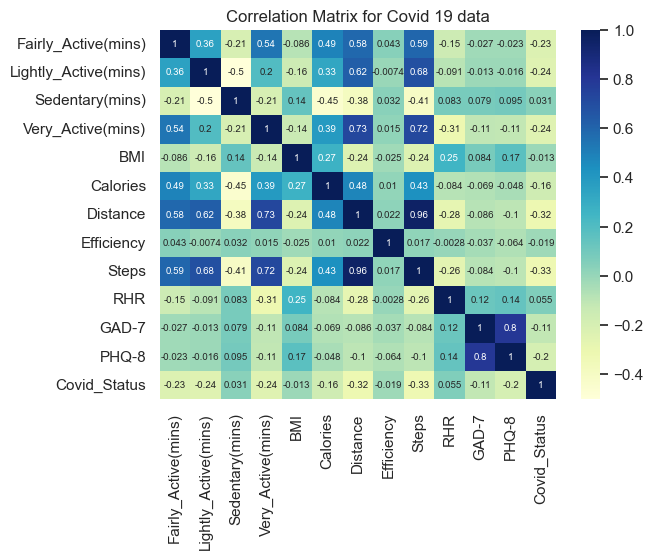

In [228]:
import matplotlib.pyplot as plt


corr = cleaned_df.corr()

ax = sns.heatmap(corr, annot = True, cmap="YlGnBu", annot_kws={'fontsize':7})


plt.setp(ax.axes.get_xticklabels(), rotation=90)

plt.title('Correlation Matrix for Covid 19 data')

## Exploring features spaces

In [229]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

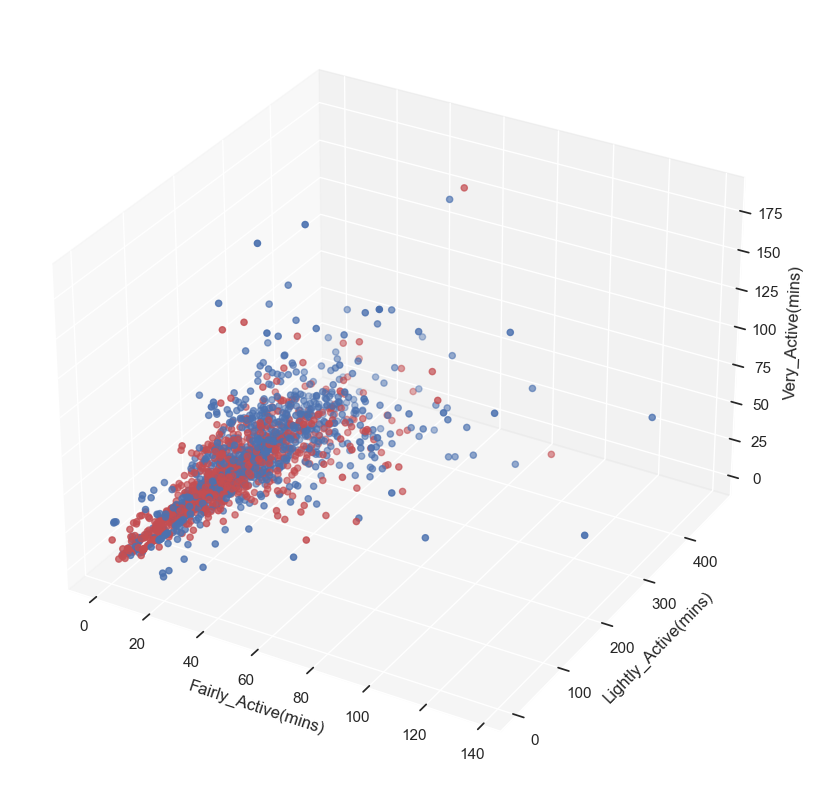

In [236]:
#Exploring features space (Fitbit data):

feature1 = cleaned_df['Fairly_Active(mins)'].values
feature2 = cleaned_df['Lightly_Active(mins)'].values 
feature3 = cleaned_df['Very_Active(mins)'].values

cleaned_df['Covid_Status']=cleaned_df['Covid_Status'].astype('str')

c = cleaned_df['Covid_Status'].values
cleaned_df['Covid_Status']=cleaned_df['Covid_Status'].astype('int')
c[c=='0'] = 'b' #negative diagnosis diabetes
c[c=='1'] = 'r' #positive diagnosis diabetes

fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(feature1, feature2, feature3, c=c)
ax.set_xlabel('Fairly_Active(mins)')
ax.set_ylabel('Lightly_Active(mins)')
ax.set_zlabel('Very_Active(mins)')
ax.set_facecolor("white")

plt.show()

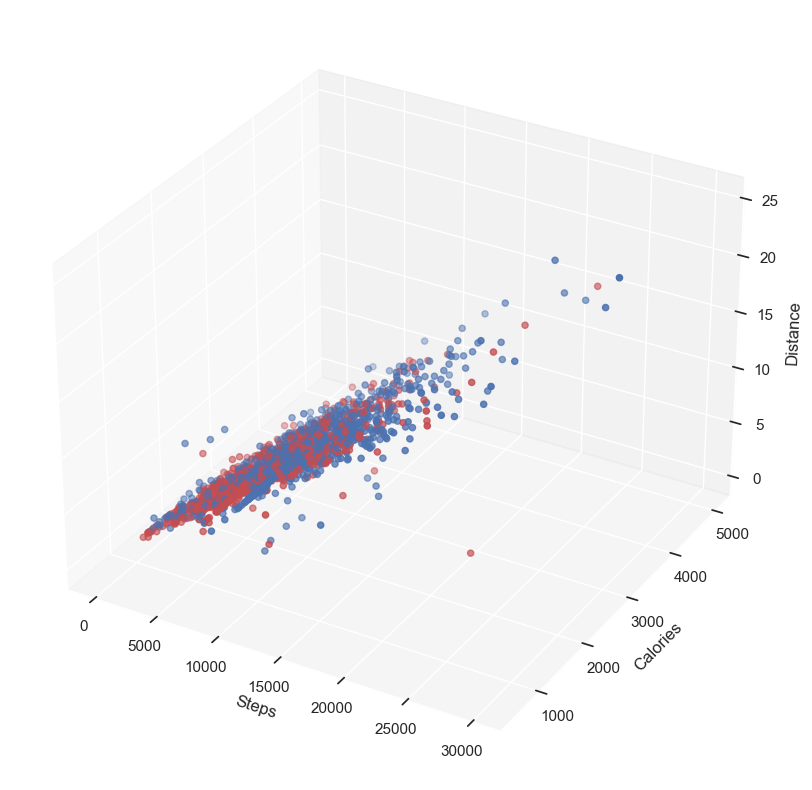

In [235]:
#Exploring features space (Steps , Calories, Distance):

feature1 = cleaned_df['Steps'].values
feature2 = cleaned_df['Calories'].values 
feature3 = cleaned_df['Distance'].values

cleaned_df['Covid_Status']=cleaned_df['Covid_Status'].astype('str')

c = cleaned_df['Covid_Status'].values
cleaned_df['Covid_Status']=cleaned_df['Covid_Status'].astype('int')
c[c=='0'] = 'b' #negative diagnosis diabetes
c[c=='1'] = 'r' #positive diagnosis diabetes

fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(feature1, feature2, feature3, c=c)
ax.set_xlabel('Steps')
ax.set_ylabel('Calories')
ax.set_zlabel('Distance')
ax.set_facecolor("white")

plt.show()

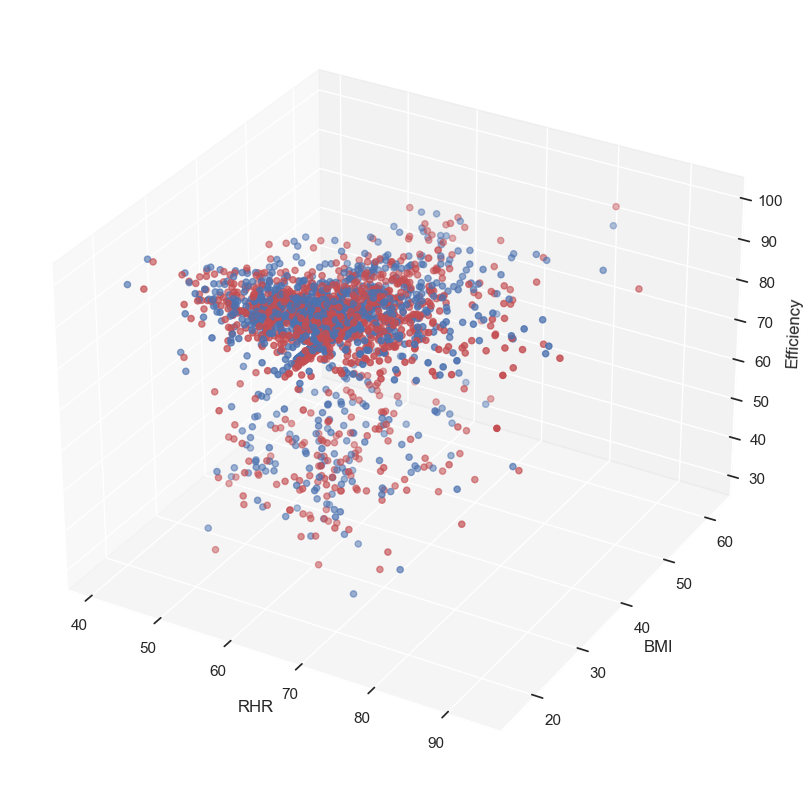

In [237]:
#Exploring features space (RHR , BMI, Efficiency):

feature1 = cleaned_df['RHR'].values
feature2 = cleaned_df['BMI'].values 
feature3 = cleaned_df['Efficiency'].values

cleaned_df['Covid_Status']=cleaned_df['Covid_Status'].astype('str')

c = cleaned_df['Covid_Status'].values
cleaned_df['Covid_Status']=cleaned_df['Covid_Status'].astype('int')
c[c=='0'] = 'b' #negative diagnosis diabetes
c[c=='1'] = 'r' #positive diagnosis diabetes

fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(feature1, feature2, feature3, c=c)
ax.set_xlabel('RHR')
ax.set_ylabel('BMI')
ax.set_zlabel('Efficiency')
ax.set_facecolor("white")


plt.show()

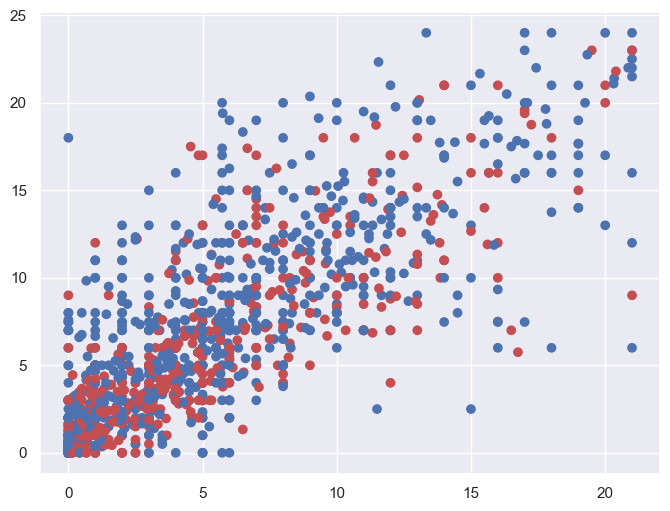

In [239]:
#Exploring features space (GAD-7, PHQ-8):

feature1 = cleaned_df['GAD-7'].values
feature2 = cleaned_df['PHQ-8'].values 

plt.figure(figsize=(8,6))
plt.scatter(feature1, feature2, c=c) # plot the feature space with color coded classes